In [2]:
!git clone https://github.com/Sneha-O-J/OIBSIP.git

fatal: destination path 'OIBSIP' already exists and is not an empty directory.


CAR PRICE PREDICTION USING MACHINE LEARNING

Price of car depends on a lot of factors like the goodwill of the brand of the car,features of the car,horsepower and mileage it gives and many more.Car price prediction is one of the major areas in machine learning .So here is a learning on how to train a car prediction model .

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

LOADING DATASET

In [ ]:
data=pd.read_csv('car data.csv')
data.head()

print(data.isnull().sum()) #checking for missingvalues
data.dropna(inplace=True)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


DATA PREPROCESSING


In [ ]:
#checking for missingvalues
print(data.isnull().sum())
data.dropna(inplace=True)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
#converting categorical features into numerical values
encoder=LabelEncoder()
data['Fuel_Type']=encoder.fit_transform(data['Fuel_Type'])
data['Selling_type']=encoder.fit_transform(data['Selling_type'])
data['Transmission']=encoder.fit_transform(data['Transmission'])
data['Owner']=encoder.fit_transform(data['Owner'])


In [ ]:
#drop unnecessary columns
data.drop(['Car_Name'],inplace=True,axis=1)
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


EXPLORATORY DATA ANALYSIS(EDA)

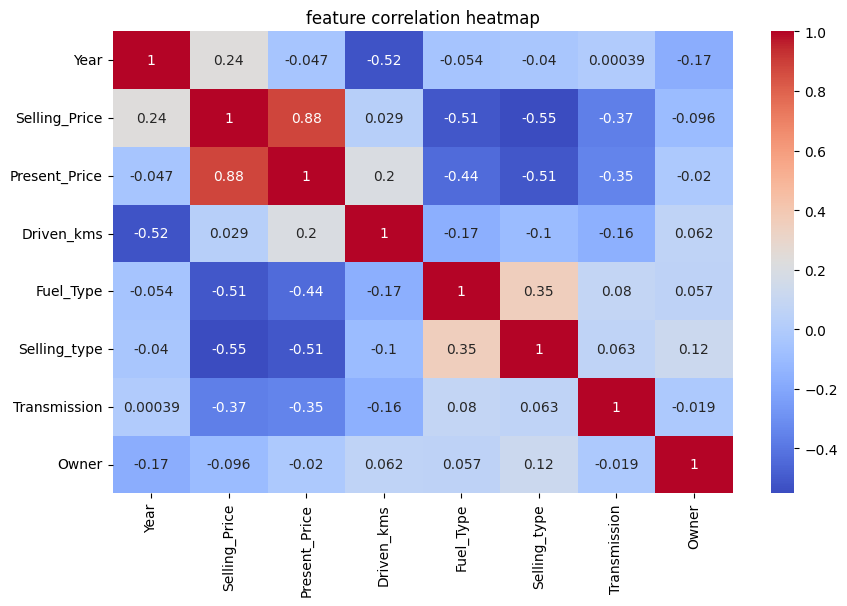

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("feature correlation heatmap")
plt.show()

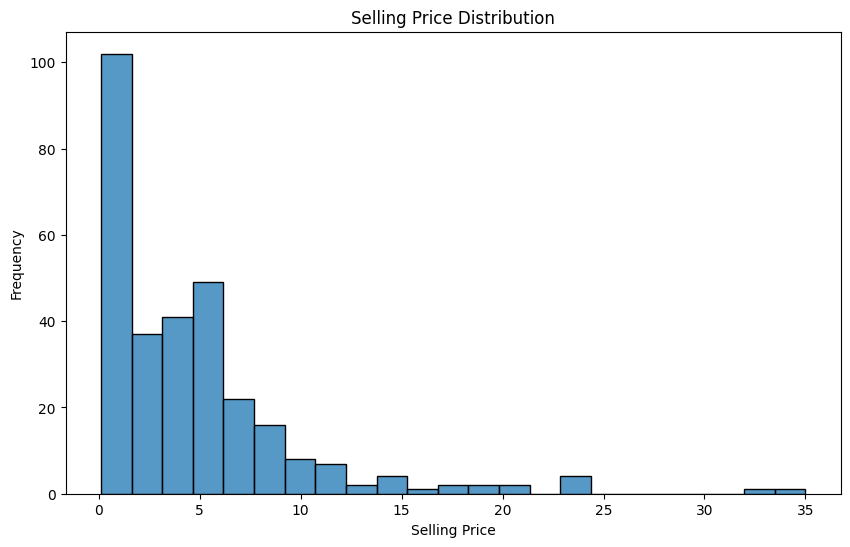

In [ ]:
#VISUALISING SELLING PRICE DISTRIBUTION
plt.figure(figsize=(10,6))
sns.histplot(data['Selling_Price'])
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

TRAINING MACHINE LEARNING MODEL

In [ ]:
X=data.drop(columns=['Selling_Price'])
y=data['Selling_Price']

In [ ]:
#splitting data to training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#scale features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

TRAINING A RANDOM FOREST REGRESSION MODEL

In [ ]:
model=RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

EVALUATE MODEL

In [ ]:
y_pred=model.predict(X_test)

print("mean absolute error=",mean_absolute_error(y_test,y_pred))
print("mean squared error=",mean_squared_error(y_test,y_pred))
print("r2 square=",r2_score(y_test,y_pred))

mean absolute error= 0.735657377049181
mean squared error= 2.4957145119672135
r2 square= 0.8849592709857703


MAKE PREDICTIONS ON NEW DATA

In [ ]:
new_data=np.array([[2020,5.59,27000,2,1,0,0]])
new_data=scaler.transform(new_data)
prediction=model.predict(new_data)
print("predicted selling price is",prediction[0])

predicted selling price is 5.1794999999999956


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
